In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import KMeans, FuzzyCMeans, SilhouetteAnalysis

(3000, 2)


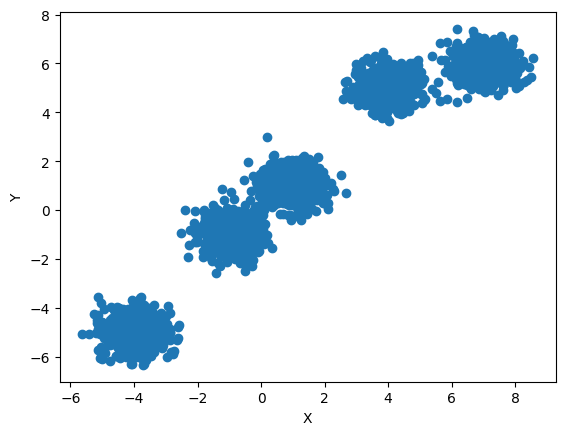

In [2]:
# Load the data

path: str = r"Datasets\Question-2\kmeans_data.npy"

data: np.ndarray = np.load(path)
print(data.shape)

# Plot the data
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Average Silhouette Score: 0.6206748064303246
Average Silhouette Score for Cluster 1: 0.8099680479091186
Average Silhouette Score for Cluster 2: 0.6576256901020898
Average Silhouette Score for Cluster 3: 0.32615198219204977
Average Silhouette Score for Cluster 4: 0.31168238004988963
Average Silhouette Score for Cluster 5: 0.6615457292417299


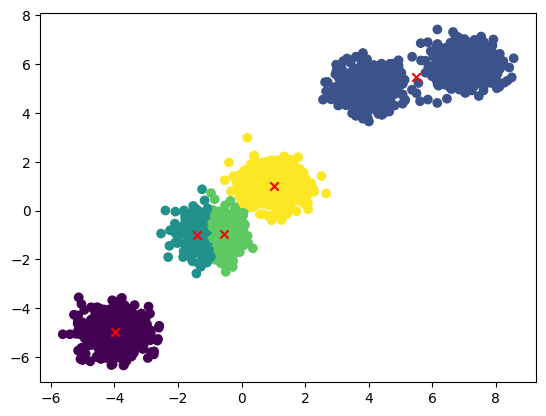

In [3]:
k: int = 5

# Perform K-Means Clustering
kmeans = KMeans(k)
kmeans.fit(data)
centroids, labels = kmeans.train()

# Perform Silhouette Analysis
sa = SilhouetteAnalysis()
sa.fit(kmeans)
scores = sa.clusterwise_scores(calculate=True)
print("Average Silhouette Score:", sa.mean_score)
for i, score in enumerate(scores, start=1):
    print(f"Average Silhouette Score for Cluster {i}: {score}")

# Plot the data
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="red")
plt.show()

min{J(U, V)} =  290.1395670350663
Average Silhouette Score: 0.7280674777338757


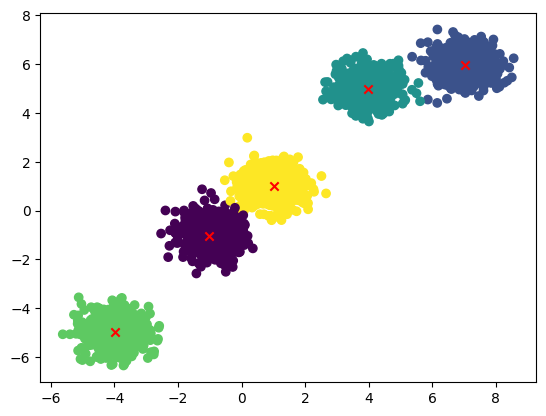

In [4]:
# Perform Fuzzy C-Means Clustering with c = k
fuzzycmeans = FuzzyCMeans(k, m=2, tol=0.3)
fuzzycmeans.fit(data)
centroids, labels = fuzzycmeans.train()
print("min{J(U, V)} = ", fuzzycmeans.objective())

# Perform Silhouette Analysis
sa = SilhouetteAnalysis()
sa.fit(fuzzycmeans)
print("Average Silhouette Score:", sa.mean_sample_score(calculate=True))

# Plot the data
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="red")
plt.show()